In [1]:
import numpy as np
from pathlib import Path
from graspy.plot import pairplot, heatmap

import sys; sys.path.append('../')
from src.tools import get_files, get_latents
from src.plotting import visualize_embeddings, make_cbar

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True, style='white', context='talk', font_scale=1)
PALETTE = sns.color_palette("Set1")

%load_ext autoreload
%autoreload 2

## MASE o correlation matrix  Gradients

In [134]:
DATA_DIR = Path("/mnt/ssd3/ronan/data/mase_11-15")

flag = f"_mase"
ftype = "h5"

groups, labels, subjs = get_latents(
    DATA_DIR, flag=flag, ids=True, ftype=ftype, as_groups=False
)

latent_lefts, _, _ = get_latents(
    DATA_DIR, flag=flag, ids=True, ftype=ftype, as_groups=False, h5_key='latent_left'
)

idx = np.argsort(subjs)
Xs, lls, subjs, labels = groups[idx], latent_lefts[idx], subjs[idx], labels[idx]

In [129]:
SAVE = False
COLORBAR = True
n_embed = 3

<Figure size 432x288 with 0 Axes>

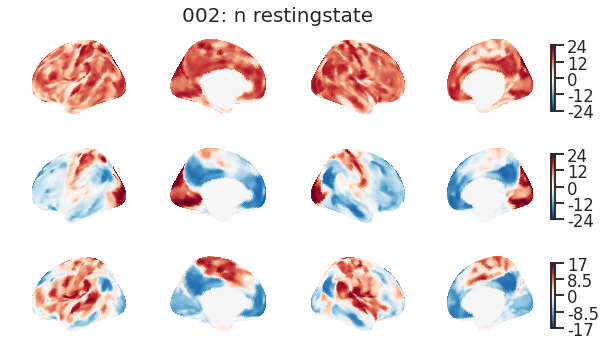

<Figure size 432x288 with 0 Axes>

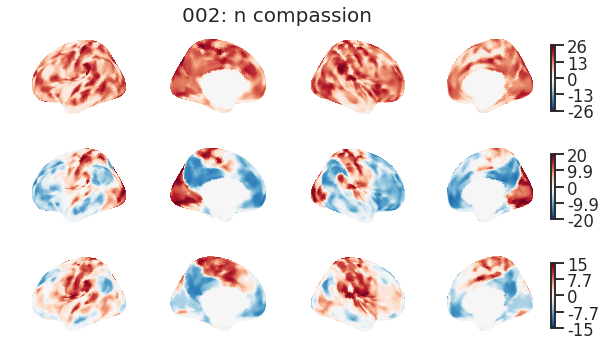

<Figure size 432x288 with 0 Axes>

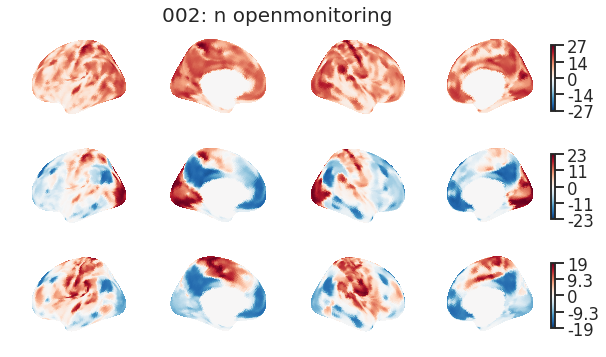

<Figure size 432x288 with 0 Axes>

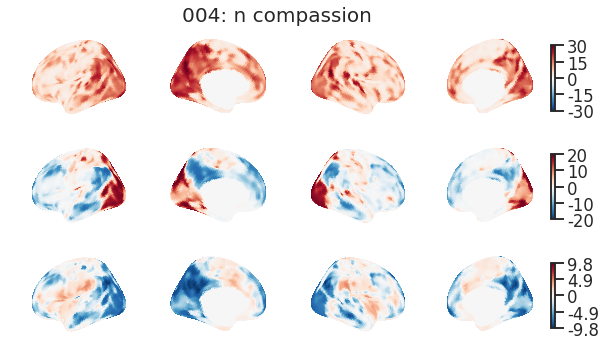

<Figure size 432x288 with 0 Axes>

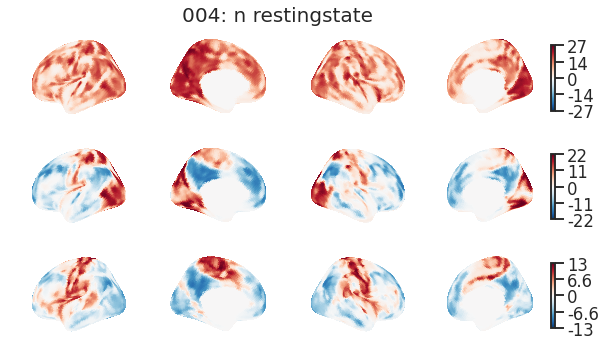

<Figure size 432x288 with 0 Axes>

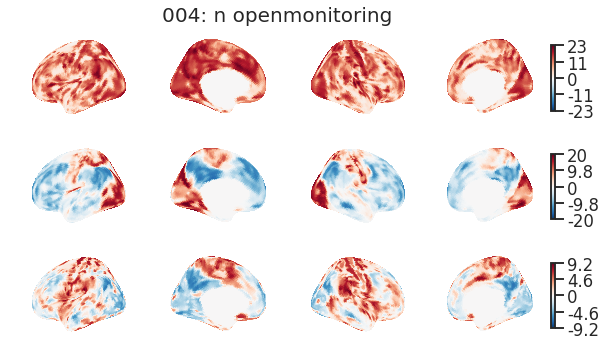

<Figure size 432x288 with 0 Axes>

KeyboardInterrupt: 

In [32]:
for X, ll, subj, (trait, state) in zip(Xs, lls, subjs, labels):
    title = f'{subj}: {trait} {state}'
    fig = visualize_embeddings(
        X[:, :n_embed],
        save_path=False,
        colorbar=COLORBAR,
        n_embed=n_embed,
        # vmax=vmax,
        title=title,
    )
    plt.show()

## Correlations

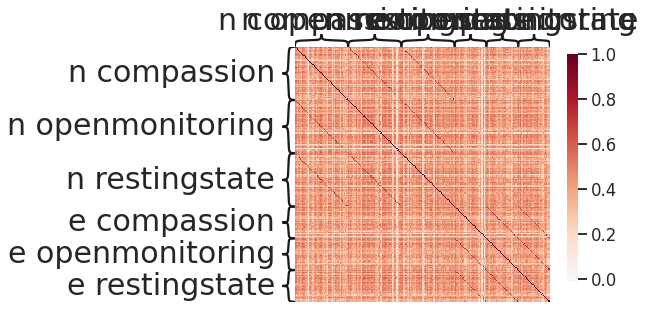

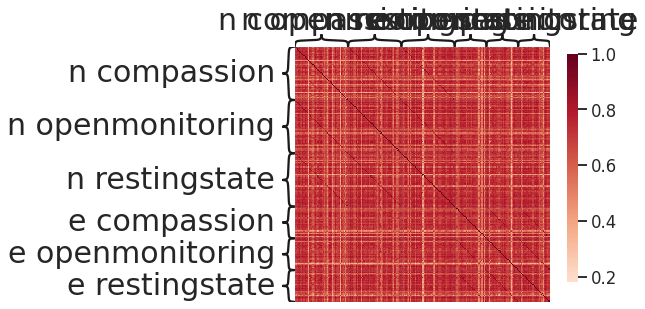

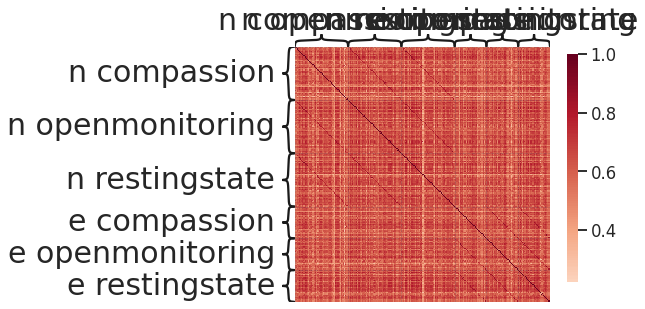

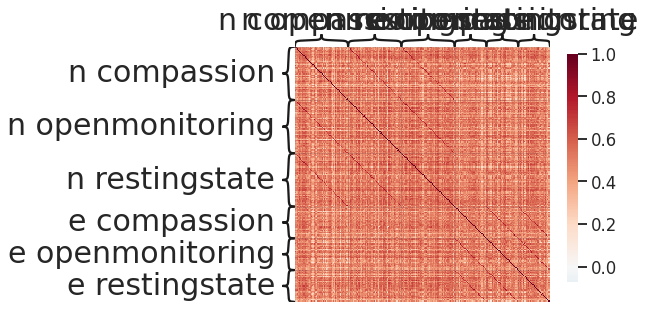

In [38]:
n_scores = 4
for i in range(n_scores):
    heatmap(
        np.corrcoef(Xs[:,:,i]),
        inner_hier_labels=[f'{a} {b}' for a, b in labels],
        #outer_hier_labels=subjs,
        figsize=(6,6),
    )

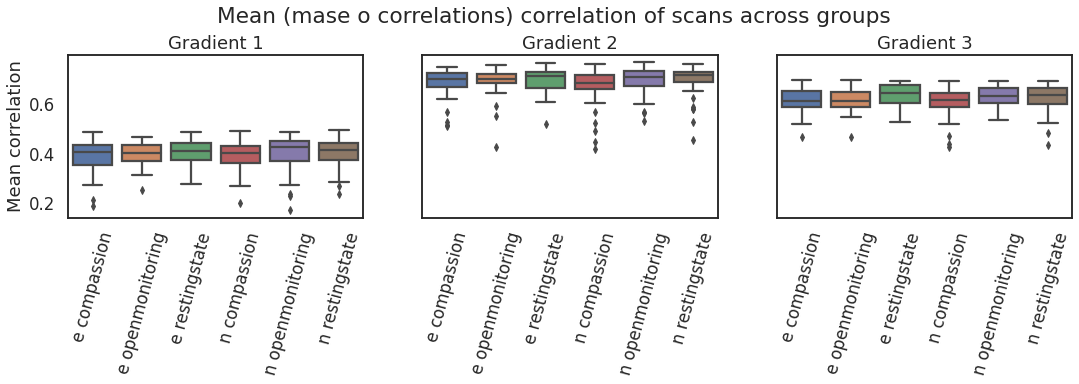

In [135]:
classes = np.asarray([f"{a} {b}" for a, b in labels])
n_scores = 3
f, axs = plt.subplots(1, n_scores, figsize=(n_scores*6,3), sharey=True)
for i in range(n_scores):
    mean_corrs = np.corrcoef(Xs[:,:,i]).mean(axis=0)
    set_labels, set_means = list(zip(*[(cls, mean_corrs[np.where(classes == cls)[0]]) for cls in np.unique(classes)]))

    sns.boxplot(data=set_means, ax=axs[i])
    axs[i].set_title(f'Gradient {i+1}')
    # axs[i].set_yticklabels([])
    axs[i].set_xticklabels(set_labels, rotation=75)

axs[0].set_ylabel('Mean correlation')
    
#axs[-1].set_xticks(plt.xticks()[0], set_labels, kwargs={'rotation': 75})
plt.suptitle('Mean (mase o correlations) correlation of scans across groups', y=1.1)
plt.show()

## MASE o Diffusion map gradients

In [136]:
DATA_DIR = Path("/mnt/ssd3/ronan/data/mase_11-16")
SOURCE = 'mase'

flag = f"_mase_dmap"
ftype = "h5"

groups, labels, subjs = get_latents(
    DATA_DIR, flag=flag, ids=True, ftype=ftype, as_groups=False
)

latent_lefts, _, _ = get_latents(
    DATA_DIR, flag=flag, ids=True, ftype=ftype, as_groups=False, h5_key='latent_left'
)

idx = np.argsort(subjs)
Xs, lls, subjs, labels = groups[idx], latent_lefts[idx], subjs[idx], labels[idx]

In [33]:
SAVE = False
COLORBAR = True
n_embed = 3

<Figure size 432x288 with 0 Axes>

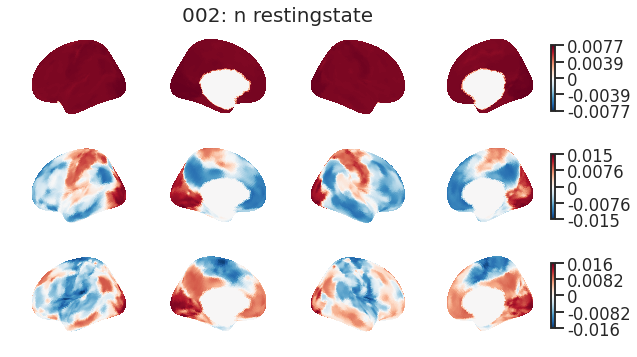

<Figure size 432x288 with 0 Axes>

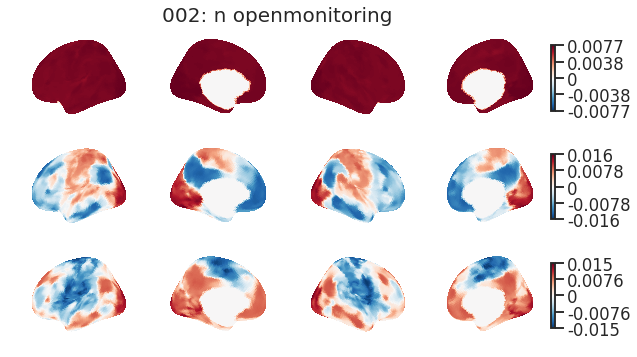

<Figure size 432x288 with 0 Axes>

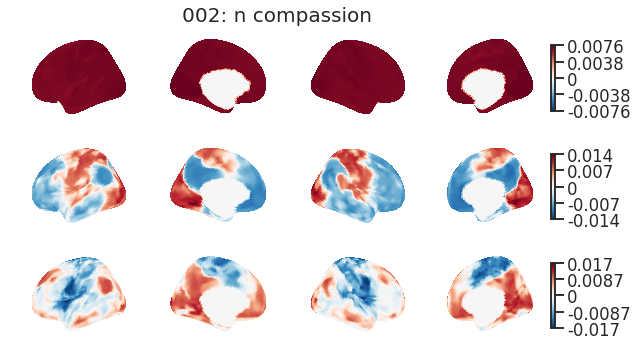

<Figure size 432x288 with 0 Axes>

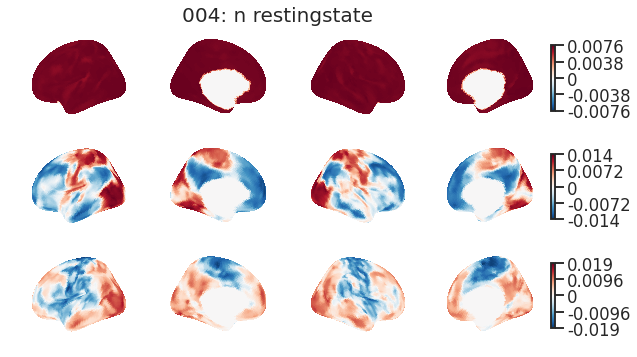

<Figure size 432x288 with 0 Axes>

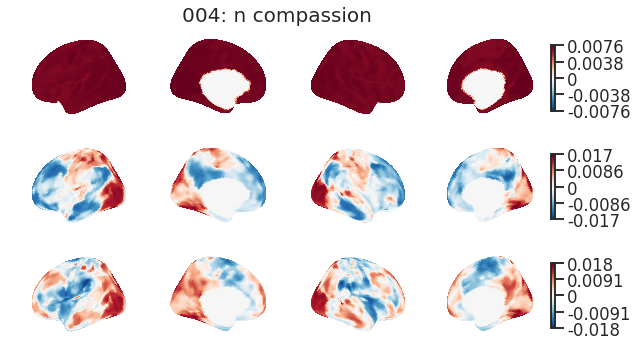

<Figure size 432x288 with 0 Axes>

KeyboardInterrupt: 

In [34]:
for X, ll, subj, (trait, state) in zip(Xs, lls, subjs, labels):
    title = f'{subj}: {trait} {state}'
    fig = visualize_embeddings(
        X[:, :n_embed] / np.linalg.norm(X[:, :n_embed], axis=0, keepdims=True),
        save_path=False,
        colorbar=COLORBAR,
        n_embed=n_embed,
        # vmax=vmax,
        title=title,
    )
    plt.show()

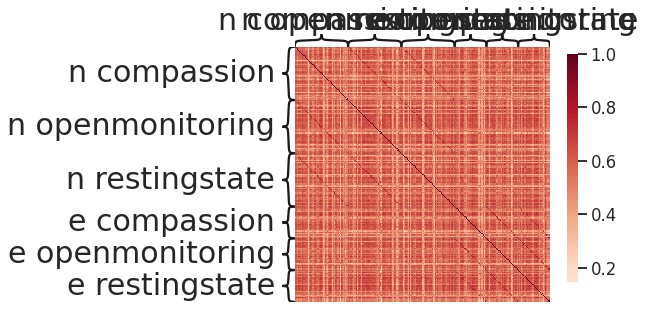

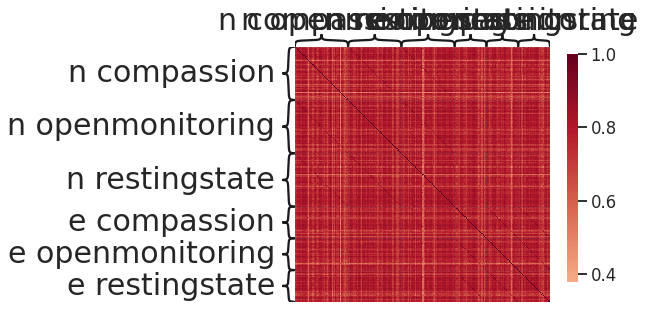

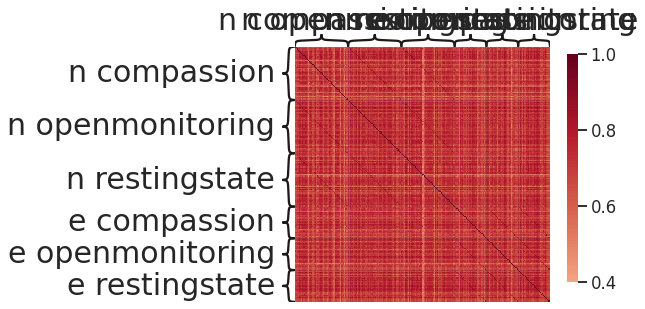

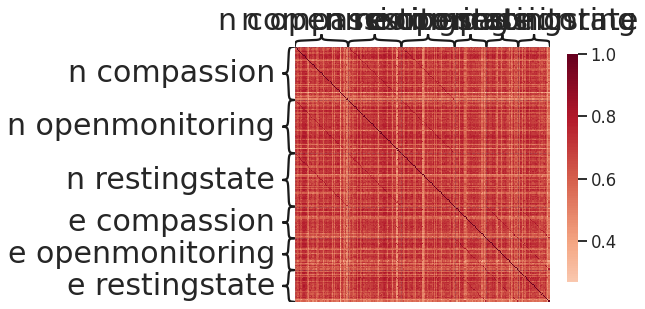

In [35]:
n_scores = 4
for i in range(n_scores):
    heatmap(
        np.corrcoef(Xs[:,:,i]),
        inner_hier_labels=[f'{a} {b}' for a, b in labels],
        #outer_hier_labels=subjs,
        figsize=(6,6),
    )

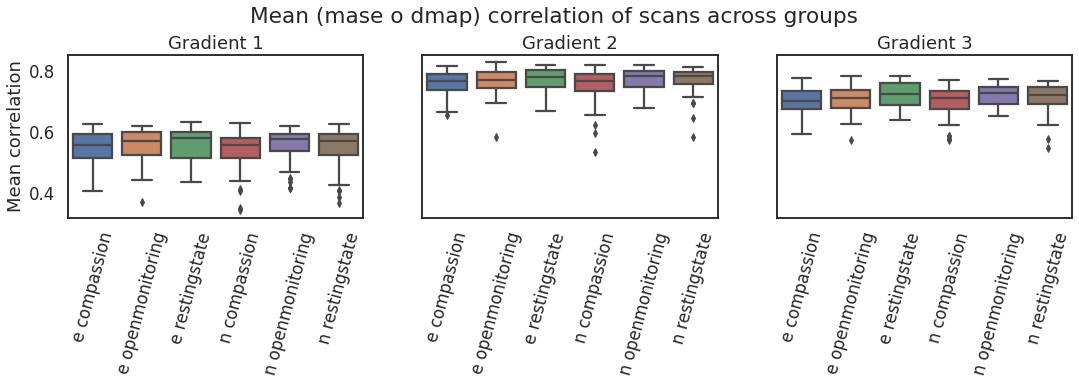

In [137]:
classes = np.asarray([f"{a} {b}" for a, b in labels])
n_scores = 3
f, axs = plt.subplots(1, n_scores, figsize=(n_scores*6,3), sharey=True)
for i in range(n_scores):
    mean_corrs = np.corrcoef(Xs[:,:,i]).mean(axis=0)
    set_labels, set_means = list(zip(*[(cls, mean_corrs[np.where(classes == cls)[0]]) for cls in np.unique(classes)]))

    sns.boxplot(data=set_means, ax=axs[i])
    axs[i].set_title(f'Gradient {i+1}')
    # axs[i].set_yticklabels([])
    axs[i].set_xticklabels(set_labels, rotation=75)

axs[0].set_ylabel('Mean correlation')
    
#axs[-1].set_xticks(plt.xticks()[0], set_labels, kwargs={'rotation': 75})
plt.suptitle('Mean (mase o dmap) correlation of scans across groups', y=1.1)
plt.show()

## gcca o raw data gradients

In [8]:
TAG = '_min_rank-ZG3_exclude-073'
DATA_DIR = Path(f"/mnt/ssd3/ronan/data/gcca_09-22-21:18{TAG}")

flag = f"_gcca"
ftype = "h5"

groups, labels, subjs = get_latents(
    DATA_DIR, flag=flag, ids=True, ftype=ftype, as_groups=False
)

idx = np.argsort(subjs)
Xs, subjs, labels = groups[idx], subjs[idx], labels[idx]

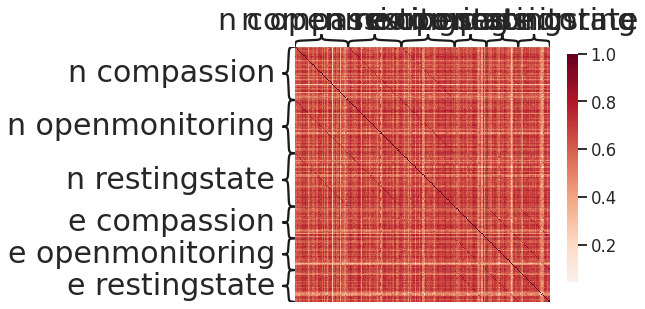

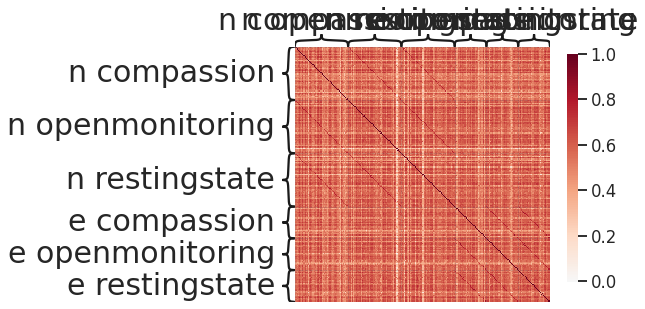

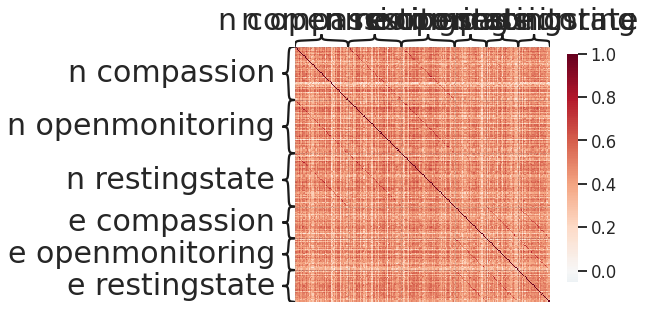

In [142]:
n_scores = 3
for i in range(n_scores):
    heatmap(
        np.corrcoef(Xs[:,:,i]),
        inner_hier_labels=[f'{a} {b}' for a, b in labels],
        #outer_hier_labels=subjs,
        figsize=(6,6),
    )

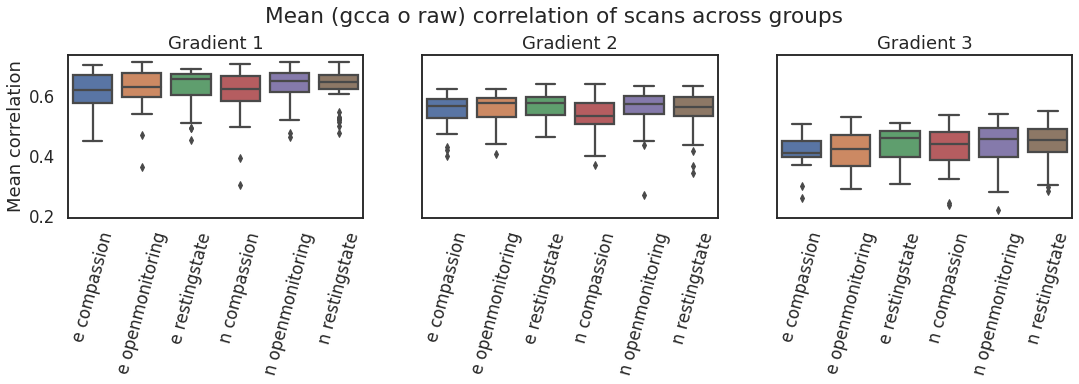

In [144]:
classes = np.asarray([f"{a} {b}" for a, b in labels])
n_scores = 3
f, axs = plt.subplots(1, n_scores, figsize=(n_scores*6,3), sharey=True)
for i in range(n_scores):
    mean_corrs = np.corrcoef(Xs[:,:,i]).mean(axis=0)
    set_labels, set_means = list(zip(*[(cls, mean_corrs[np.where(classes == cls)[0]]) for cls in np.unique(classes)]))

    sns.boxplot(data=set_means, ax=axs[i])
    axs[i].set_title(f'Gradient {i+1}')
    # axs[i].set_yticklabels([])
    axs[i].set_xticklabels(set_labels, rotation=75)

axs[0].set_ylabel('Mean correlation')
    
#axs[-1].set_xticks(plt.xticks()[0], set_labels, kwargs={'rotation': 75})
plt.suptitle('Mean (gcca o raw) correlation of scans across groups', y=1.1)
plt.show()

## gcca o dmap gradients

In [120]:
DATA_DIR = Path("/mnt/ssd3/ronan/data/gcca_dmap_11-17")

flag = f"_gcca"
ftype = "h5"

groups, labels, subjs = get_latents(
    DATA_DIR, flag=flag, ids=True, ftype=ftype, as_groups=False
)

# Sort by subject
idx = np.argsort(subjs)
Xs, subjs, labels = groups[idx], subjs[idx], labels[idx]

In [121]:
SAVE = False
COLORBAR = True
n_embed = 3

<Figure size 432x288 with 0 Axes>

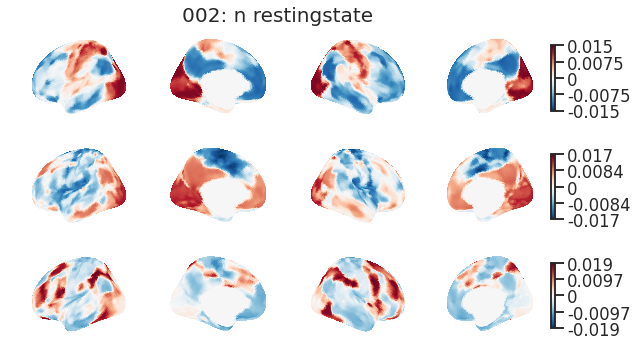

<Figure size 432x288 with 0 Axes>

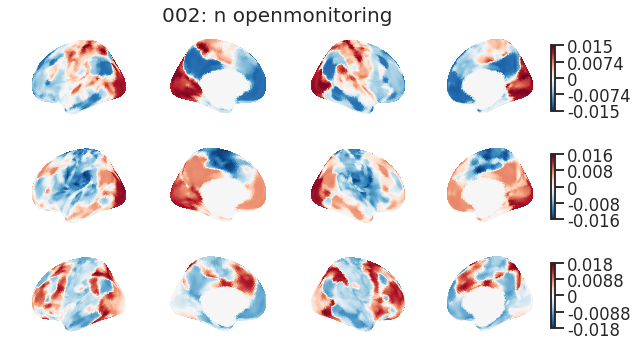

<Figure size 432x288 with 0 Axes>

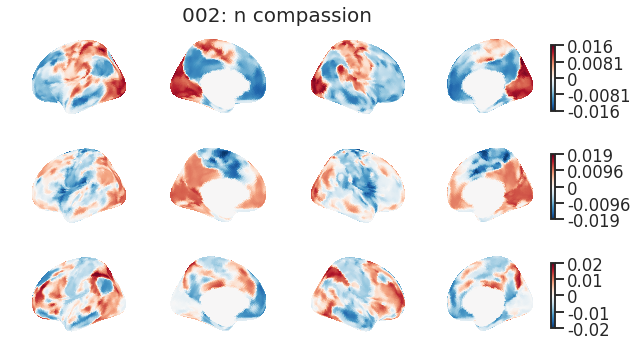

<Figure size 432x288 with 0 Axes>

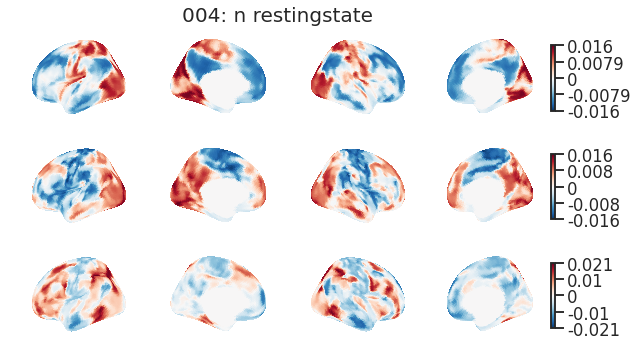

<Figure size 432x288 with 0 Axes>

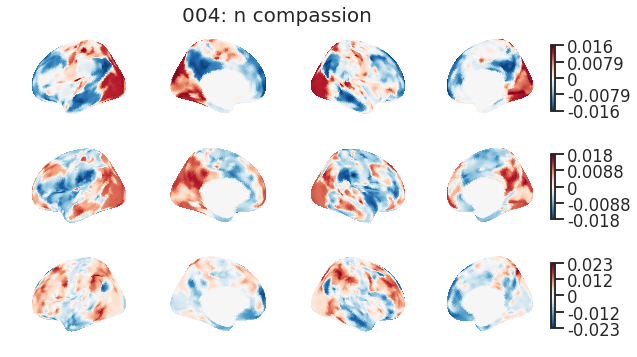

<Figure size 432x288 with 0 Axes>

KeyboardInterrupt: 

In [41]:
for X, ll, subj, (trait, state) in zip(Xs, lls, subjs, labels):
    title = f'{subj}: {trait} {state}'
    fig = visualize_embeddings(
        X[:, :n_embed] / np.linalg.norm(X[:, :n_embed], axis=0, keepdims=True),
        save_path=False,
        colorbar=COLORBAR,
        n_embed=n_embed,
        # vmax=vmax,
        title=title,
    )
    plt.show()

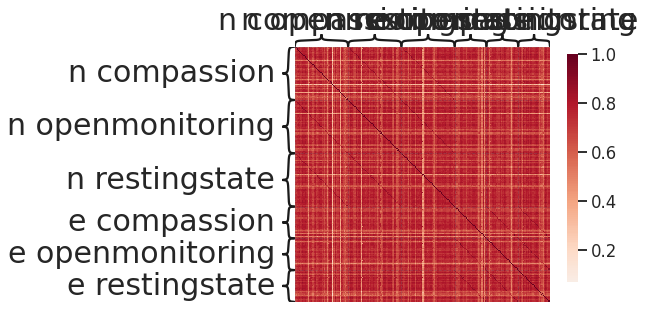

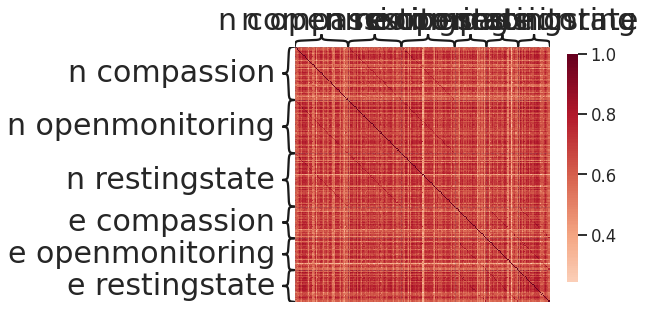

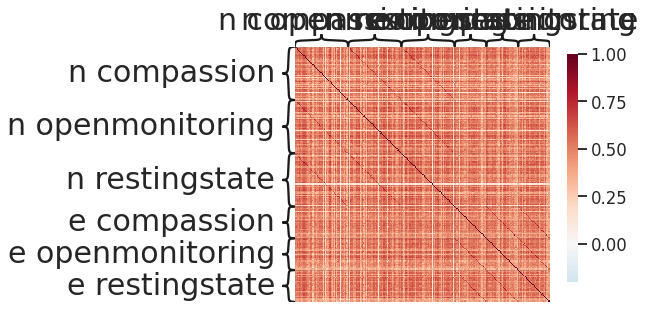

In [42]:
n_scores = 3
for i in range(n_scores):
    heatmap(
        np.corrcoef(Xs[:,:,i]),
        inner_hier_labels=[f'{a} {b}' for a, b in labels],
        #outer_hier_labels=subjs,
        figsize=(6,6),
    )

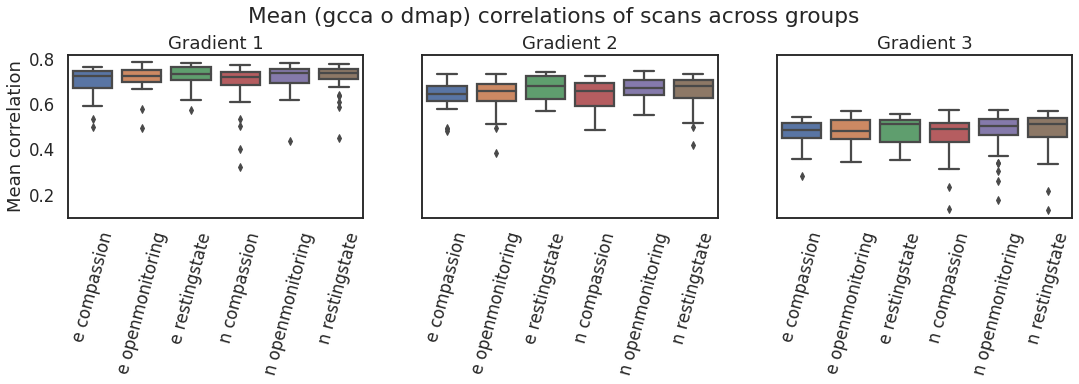

In [124]:
classes = np.asarray([f"{a} {b}" for a, b in labels])
n_scores = 3
f, axs = plt.subplots(1, n_scores, figsize=(n_scores*6,3), sharey=True)
for i in range(n_scores):
    mean_corrs = np.corrcoef(Xs[:,:,i]).mean(axis=0)
    set_labels, set_means = list(zip(*[(cls, mean_corrs[np.where(classes == cls)[0]]) for cls in np.unique(classes)]))

    sns.boxplot(data=set_means, ax=axs[i])
    axs[i].set_title(f'Gradient {i+1}')
    # axs[i].set_yticklabels([])
    axs[i].set_xticklabels(set_labels, rotation=75)

axs[0].set_ylabel('Mean correlation')
    
#axs[-1].set_xticks(plt.xticks()[0], set_labels, kwargs={'rotation': 75})
plt.suptitle('Mean (gcca o dmap) correlations of scans across groups', y=1.1)
plt.show()

## procrustes o dmap

In [125]:
datadir = Path("/mnt/ssd3/ronan/data")
unaligned_dmap_dir = datadir / f"dmap_09-04_unaligned"
aligned_dmap_dir = datadir / f"dmap_09-22_aligned"
aligned_normed_dmap_dir = datadir / f"dmap_09-23_aligned_normed"

In [126]:
data = "dmap"
flag = "_dmap"
ftype = "npy"
source_dir = aligned_dmap_dir

groups, labels, subjs = get_latents(
    source_dir, flag=flag, ids=True, ftype=ftype, source=data, as_groups=False
)

# Sort by subject
idx = np.argsort(subjs)
Xs, subjs, labels = groups[idx], subjs[idx], labels[idx]

In [88]:
SAVE = False
COLORBAR = True
n_embed = 3

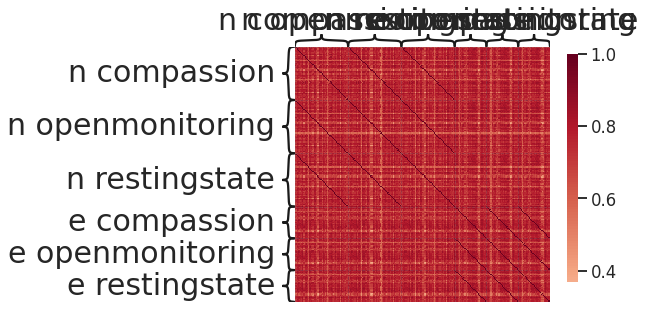

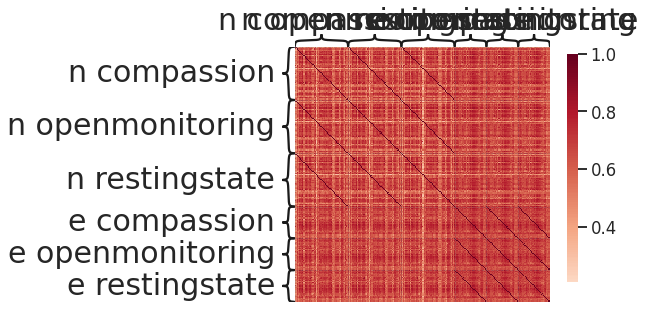

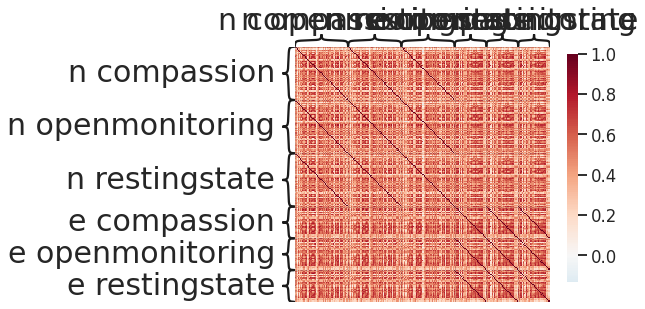

In [89]:
n_scores = 3
for i in range(n_scores):
    heatmap(
        np.corrcoef(Xs[:,:,i]),
        inner_hier_labels=[f'{a} {b}' for a, b in labels],
        #outer_hier_labels=subjs,
        figsize=(6,6),
    )

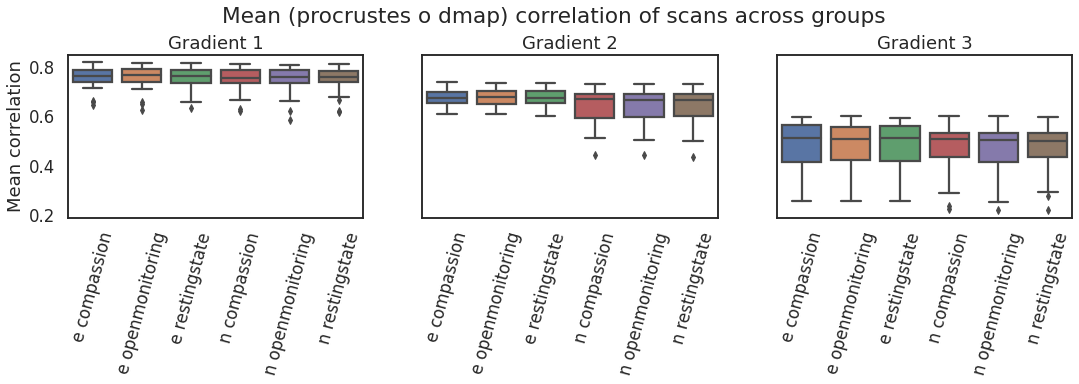

In [127]:
classes = np.asarray([f"{a} {b}" for a, b in labels])
n_scores = 3
f, axs = plt.subplots(1, n_scores, figsize=(n_scores*6,3), sharey=True)
for i in range(n_scores):
    mean_corrs = np.corrcoef(Xs[:,:,i]).mean(axis=0)
    set_labels, set_means = list(zip(*[(cls, mean_corrs[np.where(classes == cls)[0]]) for cls in np.unique(classes)]))

    sns.boxplot(data=set_means, ax=axs[i])
    axs[i].set_title(f'Gradient {i+1}')
    # axs[i].set_yticklabels([])
    axs[i].set_xticklabels(set_labels, rotation=75)

axs[0].set_ylabel('Mean correlation')
    
#axs[-1].set_xticks(plt.xticks()[0], set_labels, kwargs={'rotation': 75})
plt.suptitle('Mean (procrustes o dmap) correlation of scans across groups', y=1.1)
plt.show()

## Meaned MASE

In [2]:
DATA_DIR = Path("/mnt/ssd3/ronan/data/mase_dmap_meaned_11-23")

flag = f"_mase"
ftype = "h5"

groups, labels, subjs = get_latents(
    DATA_DIR, flag=flag, ids=True, ftype=ftype, as_groups=False
)

latent_lefts, _, _ = get_latents(
    DATA_DIR, flag=flag, ids=True, ftype=ftype, as_groups=False, h5_key='latent_left'
)

idx = np.argsort(subjs)
Xs, lls, subjs, labels = groups[idx], latent_lefts[idx], subjs[idx], labels[idx]

In [4]:
SAVE = False
COLORBAR = True
n_embed = 3

<Figure size 432x288 with 0 Axes>

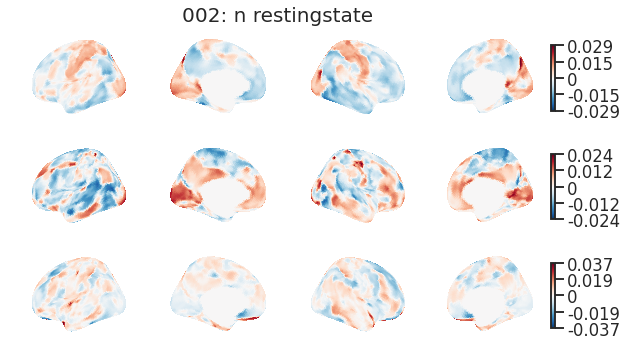

<Figure size 432x288 with 0 Axes>

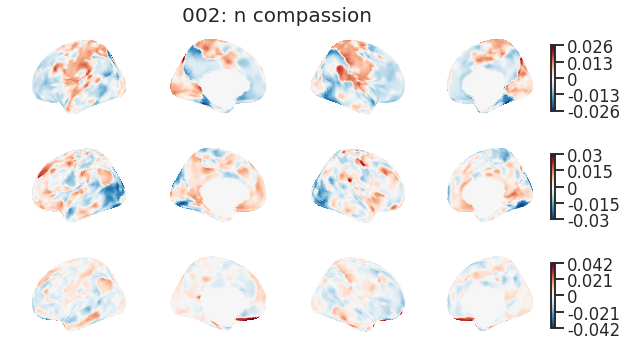

<Figure size 432x288 with 0 Axes>

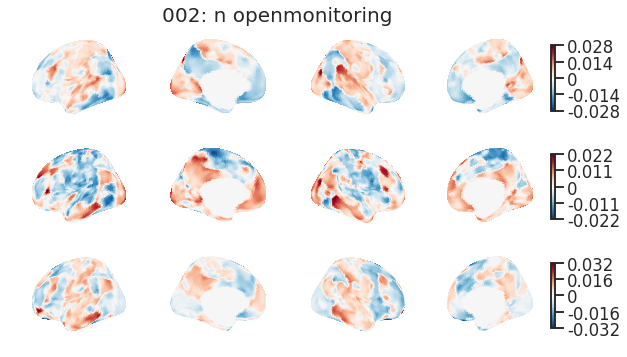

<Figure size 432x288 with 0 Axes>

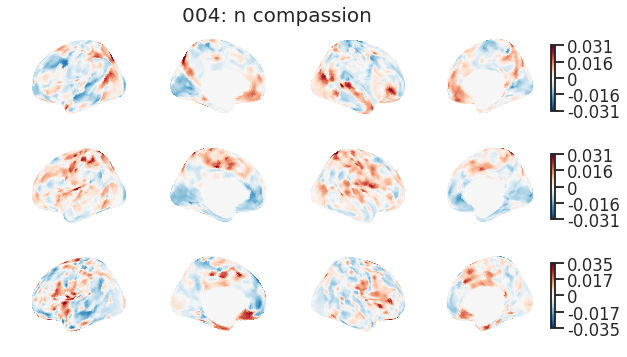

<Figure size 432x288 with 0 Axes>

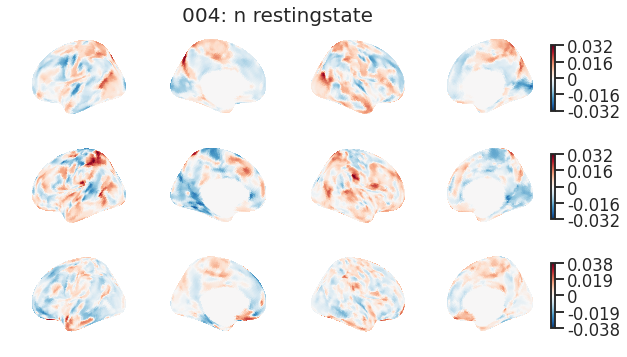

<Figure size 432x288 with 0 Axes>

KeyboardInterrupt: 

In [5]:
for X, ll, subj, (trait, state) in zip(Xs, lls, subjs, labels):
    title = f'{subj}: {trait} {state}'
    fig = visualize_embeddings(
        X[:, :n_embed] / np.linalg.norm(X[:, :n_embed], axis=0, keepdims=True),
        save_path=False,
        colorbar=COLORBAR,
        n_embed=n_embed,
        # vmax=vmax,
        title=title,
    )
    plt.show()

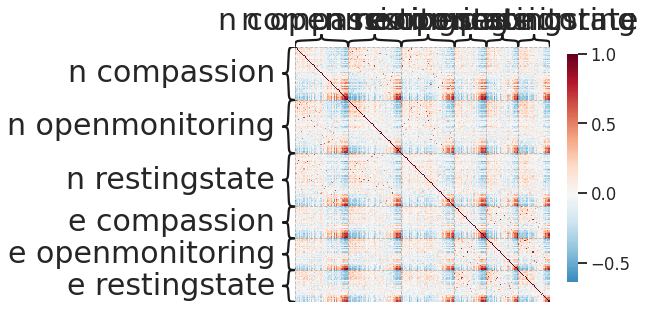

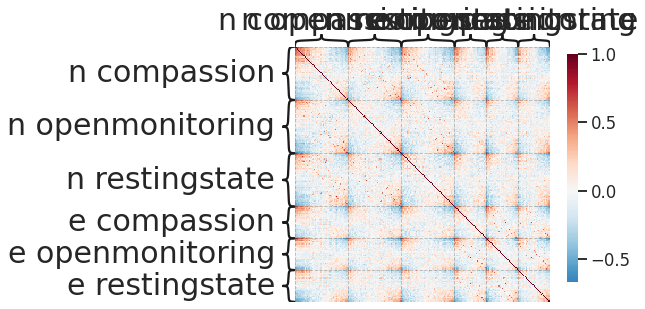

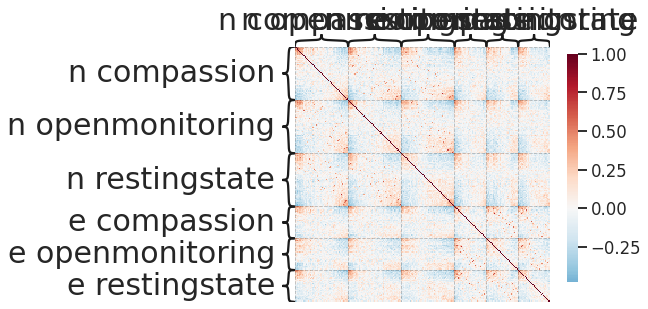

In [6]:
n_scores = 3
for i in range(n_scores):
    heatmap(
        np.corrcoef(Xs[:,:,i]),
        inner_hier_labels=[f'{a} {b}' for a, b in labels],
        #outer_hier_labels=subjs,
        figsize=(6,6),
    )

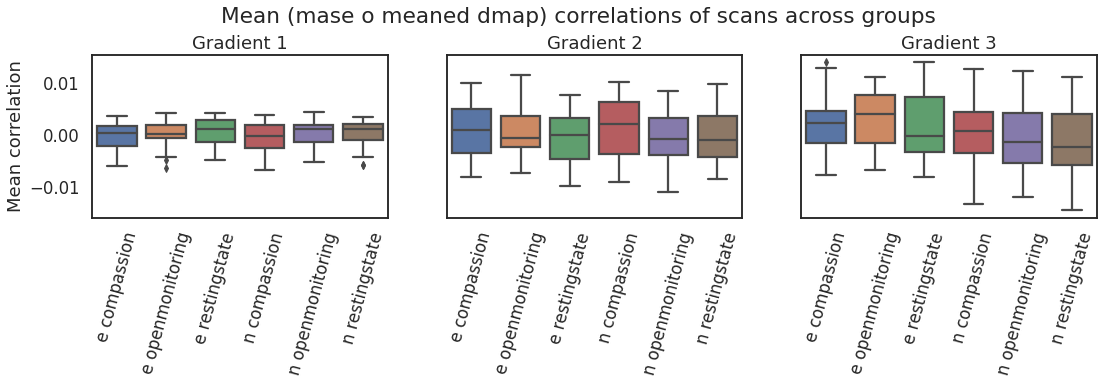

In [7]:
classes = np.asarray([f"{a} {b}" for a, b in labels])
n_scores = 3
f, axs = plt.subplots(1, n_scores, figsize=(n_scores*6,3), sharey=True)
for i in range(n_scores):
    mean_corrs = np.corrcoef(Xs[:,:,i]).mean(axis=0)
    set_labels, set_means = list(zip(*[(cls, mean_corrs[np.where(classes == cls)[0]]) for cls in np.unique(classes)]))

    sns.boxplot(data=set_means, ax=axs[i])
    axs[i].set_title(f'Gradient {i+1}')
    # axs[i].set_yticklabels([])
    axs[i].set_xticklabels(set_labels, rotation=75)

axs[0].set_ylabel('Mean correlation')
    
#axs[-1].set_xticks(plt.xticks()[0], set_labels, kwargs={'rotation': 75})
plt.suptitle('Mean (mase o meaned dmap) correlations of scans across groups', y=1.1)
plt.show()